# Principal Component Analysis
Yan Wu
yanwu26@gmail.com

PCA is a statitistical risk model that uses othogonal transformations of observations into a set of uncorrelated variables. The robustness is not having predefined factors is advantageous during times when traditional factors are correlated. The lack of names to the factors is often a point of confusion for some users, but generally the factors work the same. 


In [38]:
import numpy as np
import pandas as pd
#import pandas.io.data as web
from sklearn.decomposition import KernelPCA
from yahoo_finance import Share
from pandas_datareader import data as wb
import pandas_datareader as pdr
import fix_yahoo_finance # must pip install first 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as image
import datetime
import seaborn as sns
from scipy.stats import gmean, hmean
import statsmodels.api as sm
from statsmodels import regression
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [47]:
## Helper function to get prices from Yahoo
def get_historical_closes(ticker, start_date, end_date):
    # get the data for the tickers.  This will be a panel
    p = wb.get_data_yahoo(ticker, start_date, end_date)    
    # convert the panel to a DataFrame and selection only Adj Close
    # while making all index levels columns
    d = p.to_frame()['Adj Close'].reset_index()
    # rename the columns
    d.rename(columns={'minor': 'Ticker', 'Adj Close': 'Close'}, inplace=True)
    # pivot each ticker to a column
    pivoted = d.pivot(index='Date', columns='Ticker')
    # and drop the one level on the columns
    pivoted.columns = pivoted.columns.droplevel(0)
    return pivoted

In [48]:
## Helper Functions 
funct_scale = lambda x: (x - x.mean()) / x.std() ## scale stocks to proper size
funct_wgt = lambda x: x / x.sum() ##get weights

## PCA using one PCA 

The DAX 30 is a benchmark represented by 30 underlying securities. All of those underlying securities together express the move of the DAX 30

In [49]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE','BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE','DBK.DE'
            ,'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE','FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE','LIN.DE', 'LXS.DE'
            ,'MRK.DE', 'MUV2.DE', 'RWE.DE','SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE','^GDAXI']

In [50]:
## Get data
px_data=(get_historical_closes(symbols,'2010-01-01','2015-12-31')).dropna()
bm=pd.DataFrame(px_data.pop('^GDAXI'))
print(px_data.head(3))
print(bm.head(3))

b'Skipping line 4: expected 1 fields, saw 2\n'


[***********           23%                       ]  7 of 31 downloaded

b'Skipping line 4: expected 1 fields, saw 2\n'
b'Skipping line 4: expected 1 fields, saw 2\n'


[**********************97%********************** ]  30 of 31 downloaded
The following tickers failed to download:
 CON.DE
Ticker         ADS.DE     ALV.DE     BAS.DE    BAYN.DE     BEI.DE     BMW.DE     CBK.DE     DAI.DE     DB1.DE     DBK.DE     DPW.DE    DTE.DE    EOAN.DE     FME.DE     FRE.DE     HEI.DE    HEN3.DE    IFX.DE     LHA.DE     LIN.DE     LXS.DE     MRK.DE    MUV2.DE     RWE.DE     SAP.DE     SDF.DE     SIE.DE     TKA.DE    VOW3.DE
Date                                                                                                                                                                                                                                                                                                                                   
2010-01-04  34.096855  57.985924  35.122593  46.225060  41.212765  25.236019  47.255894  27.826933  45.435162  33.017456  10.652568  6.765118  17.027613  34.101215  11.666976  44.684528  32.726494  3.673788  10.223866  71.

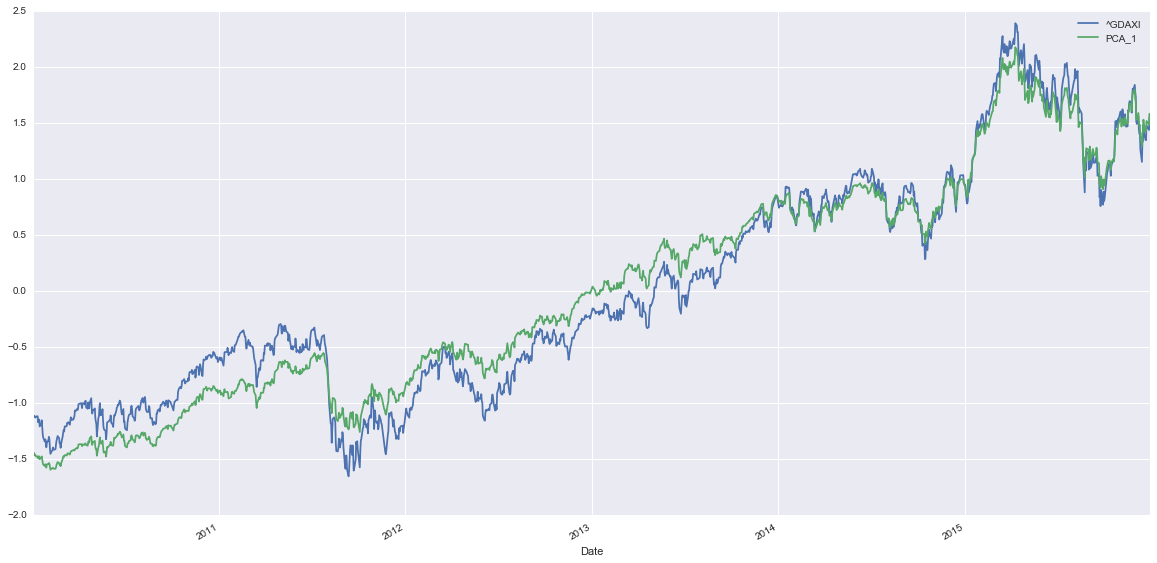

In [53]:
pca = KernelPCA(n_components=1).fit(px_data.apply(funct_scale))
bm['PCA_1'] = pca.transform(-px_data)
bm.apply(funct_scale).plot(figsize=(20, 10))

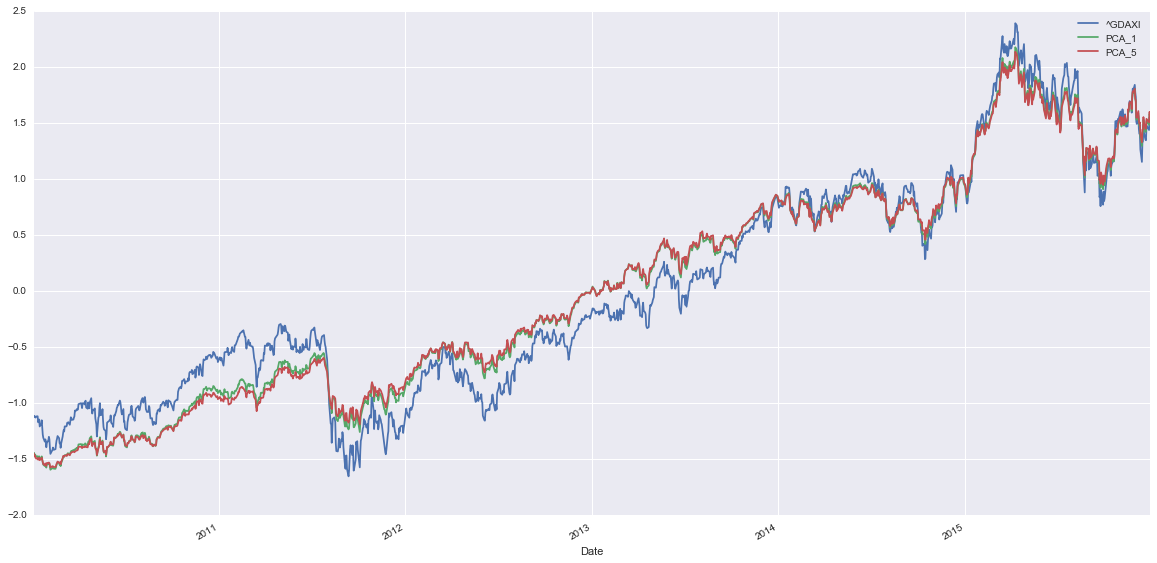

In [54]:
pca = KernelPCA(n_components=5).fit(px_data.apply(funct_scale))
pca_components = pca.transform(px_data)
weights = funct_wgt(pca.lambdas_)
bm['PCA_5'] = np.dot(pca_components, weights)
bm.apply(funct_scale).plot(figsize=(20, 10))

Represented in a scatter plot below

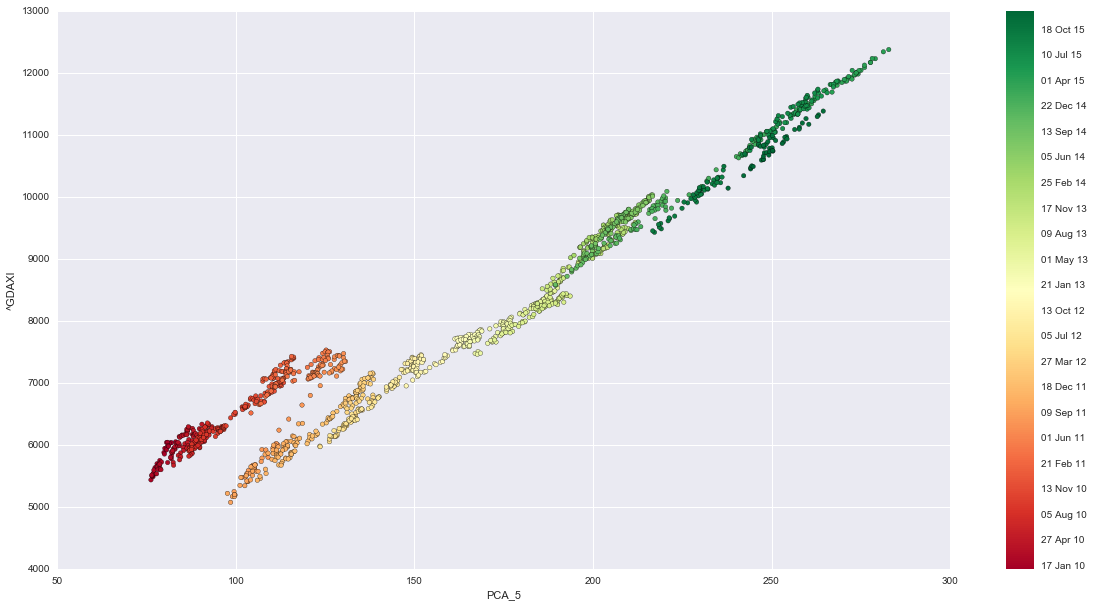

In [57]:
#mpl.dates.date2num(px_data.index.to_pydatetime())
mpl_dates = mpl.dates.date2num(px_data.index.to_pydatetime())

plt.figure(figsize=(20, 10))
plt.scatter(bm['PCA_5'], bm['^GDAXI'], c=mpl_dates, cmap=plt.cm.RdYlGn)
lin_reg = np.polyval(np.polyfit(bm['PCA_5'], bm['^GDAXI'], 1),bm['PCA_5'])
#plt.plot(px_data['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=100),format=mpl.dates.DateFormatter('%d %b %y'))